# 1. ライブラリのインポート

In [1]:
# 初めて実行するときは以下をコメントアウトして実行してください
# !pip install --upgrade pip
# !pip install --pandas
# !pip install --matplotlib

import pandas as pd # データを操作するライブラリ
import matplotlib.pyplot as plt # グラフを作成するライブラリ
plt.rcParams['font.family'] = 'Hiragino Sans' #日本語フォントを指定（Mac）
# plt.rcParams['font.family'] = 'MS Gothic' #日本語フォントを指定（Windows）

# 2. データのインポート  
`pandas`の`read_csv`メソッドを利用してcsvファイルをインポートして`df`という名前のデータフレームを作成する。

In [4]:
df = pd.read_csv('../00_dataset/.data.csv')

# 3.データの確認
作成したデータフレーム名を入力するとデータの中身が確認できる

In [5]:
df


,ケースID,日時,顧客ID,年齢,性別,商品,契約日時,キャンセル日時,商品名,価格,更新期間
0,CC52120,2019-01-01 07:56:58,C29793,62,female,prd_1,2019-01-01 08:00:46,NaN,annual_subscription,1200,12
1,CC52122,2019-01-01 08:05:10,C29794,61,male,prd_1,2019-01-01 08:09:32,NaN,annual_subscription,1200,12
2,CC52124,2019-01-01 08:44:32,C29795,58,male,prd_1,2019-01-01 08:45:42,NaN,annual_subscription,1200,12
3,CC52126,2019-01-01 08:54:33,C29796,58,male,prd_1,2019-01-01 08:58:46,NaN,annual_subscription,1200,12
4,CC52127,2019-01-01 08:56:58,C29797,72,female,prd_1,2019-01-01 08:59:29,NaN,annual_subscription,1200,12
...,...,...,...,...,...,...,...,...,...,...,...
102177,CC330493,2021-12-31 14:11:33,C131970,39,female,prd_1,2021-12-31 14:18:00,NaN,annual_subscription,1200,12
102178,CC330498,2021-12-31 14:32:31,C131971,77,male,prd_2,2021-12-31 14:35:23,NaN,monthly_subscription,125,1
102179,CC330502,2021-12-31 14:36:06,C131972,49,male,prd_2,2021-12-31 14:41:15,NaN,monthly_subscription,125,1
102180,CC330515,2021-12-31 15:02:11,C131973,46,male,prd_2,2021-12-31 15:05:48,NaN,monthly_subscription,125,1


# 4.データの前処理

## 4-1. `年代`列の追加  
年齢列から、29歳→20代のように変換した年代列を作成する。  
10の位の値を取得して、10をかけ、'代'という文字を付け足す。  
`29 // 10` とすれば10で割って小数点以下を切り捨て、10の位の値を取得できる。


In [6]:
df['年代'] = None # 年代列を作成する。（一時的にカラにしておく）
df['年代'] = df['年齢'] // 10 # 10で割って、小数点以下を切り捨てる（10の位の値を取得）
df['年代'] = df['年代'] * 10 # 10を掛ける
df['年代'] = df['年代'].astype(str) # 文字列に変換する
df['年代'] = df['年代'] + '代' # 代という文字を付け足す
df['年代']

0         60代
1         60代
2         50代
3         50代
4         70代
         ... 
102177    30代
102178    70代
102179    40代
102180    40代
102181    40代
Name: 年代, Length: 102182, dtype: object

## 4-2. `年`、`月`の列を追加
`日時`列から`年`、`月`の値を取得して列を作成する。

### 年  
日時列の左から4文字目まで取得して、年の数値を抽出する。  
年の数値に 年 の文字を追加する。

In [7]:
df['年'] = None # 年の列を作成する（一時的にカラにしておく）
df['年'] = df['日時'].str[:4] # .strで指定列の文字の値を取得する ⇨ [:4]で左から4文字目までの値を取得する
df['年'] = df['年'] + '年' # 年という文字を付け足す
df['年']

0         2019年
1         2019年
2         2019年
3         2019年
4         2019年
          ...  
102177    2021年
102178    2021年
102179    2021年
102180    2021年
102181    2021年
Name: 年, Length: 102182, dtype: object

### 月  
日時列の左から5~6文字目まで取得して、月の数値を抽出する。  
月の数値に 月 の文字を追加する。

In [8]:
df['月'] = None # 月の列を作成する（一時的にカラにしておく）
df['月'] = df['日時'].str[5:7] # .strで指定列の文字の値を取得する ⇨ [5:7]で左から5~6文字目までの値を取得する(「まで」は指定したい数の一つ上の数字を記載する)
df['月'] = df['月'] + '月' # 月という文字を付け足す
df['月']

0         01月
1         01月
2         01月
3         01月
4         01月
         ... 
102177    12月
102178    12月
102179    12月
102180    12月
102181    12月
Name: 月, Length: 102182, dtype: object

## 4-3. レコード数の集計用の列を作成する
後でグラフを作成するときに表示するカスタマサポート対応件数の集計をするために、`1`の値が入った列を追加する。

In [9]:
df['件数'] = 1
df['件数']

0         1
1         1
2         1
3         1
4         1
         ..
102177    1
102178    1
102179    1
102180    1
102181    1
Name: 件数, Length: 102182, dtype: int64

## 4-4. 完成したデータフレーム

In [10]:
df

,ケースID,日時,顧客ID,年齢,性別,商品,契約日時,キャンセル日時,商品名,価格,更新期間,年代,年,月,件数
0,CC52120,2019-01-01 07:56:58,C29793,62,female,prd_1,2019-01-01 08:00:46,NaN,annual_subscription,1200,12,60代,2019年,01月,1
1,CC52122,2019-01-01 08:05:10,C29794,61,male,prd_1,2019-01-01 08:09:32,NaN,annual_subscription,1200,12,60代,2019年,01月,1
2,CC52124,2019-01-01 08:44:32,C29795,58,male,prd_1,2019-01-01 08:45:42,NaN,annual_subscription,1200,12,50代,2019年,01月,1
3,CC52126,2019-01-01 08:54:33,C29796,58,male,prd_1,2019-01-01 08:58:46,NaN,annual_subscription,1200,12,50代,2019年,01月,1
4,CC52127,2019-01-01 08:56:58,C29797,72,female,prd_1,2019-01-01 08:59:29,NaN,annual_subscription,1200,12,70代,2019年,01月,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102177,CC330493,2021-12-31 14:11:33,C131970,39,female,prd_1,2021-12-31 14:18:00,NaN,annual_subscription,1200,12,30代,2021年,12月,1
102178,CC330498,2021-12-31 14:32:31,C131971,77,male,prd_2,2021-12-31 14:35:23,NaN,monthly_subscription,125,1,70代,2021年,12月,1
102179,CC330502,2021-12-31 14:36:06,C131972,49,male,prd_2,2021-12-31 14:41:15,NaN,monthly_subscription,125,1,40代,2021年,12月,1
102180,CC330515,2021-12-31 15:02:11,C131973,46,male,prd_2,2021-12-31 15:05:48,NaN,monthly_subscription,125,1,40代,2021年,12月,1


# 5. グラフの作成
はじめにインポートしたmatplotlibというライブラリを用いてグラフを作成する

## 5-1. カードを作成する

In [11]:
# # カードに表示する値を設定する

title = 'カスタマサポート対応件数'
value = df['件数'].sum() #4-4で設定した件数列の総計をしてレコード数を取得

print(title)
print(value)

カスタマサポート対応件数
102182


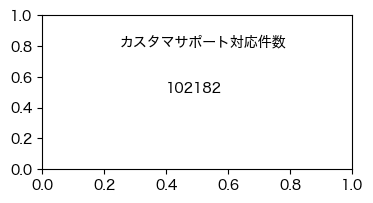

In [12]:
# # 最小限の設定でグラフを表示

fig = plt.figure(figsize=(4,2)) # グラフのサイズを指定

# タイトルを表示
plt.text(
    0.25, # 横軸方向の位置を指定
    0.8, # 縦軸方向の位置を指定
    title # 表示する文字を指定
  )

plt.text(
    0.4, # 横軸方向の位置を指定
    0.5, # 縦軸方向の位置を指定
    value # 表示する文字を指定
  )

plt.show() #グラフを表示

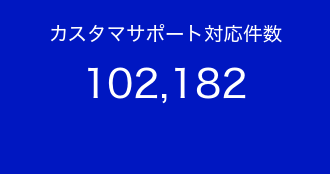

In [39]:
# # フォーマットを調整してカードを表示

fig = plt.figure(figsize=(4,2)) # グラフのサイズを指定
fig.patch.set_facecolor('#0017C1') #背景色を設定
plt.axis('off') # 縦軸、横軸を非表示にする


plt.text(
    0.5, # 横軸方向の位置を指定 ha='center'で開始点を中に設定したので、0.5に変更
    0.8, # 縦軸方向の位置を指定
    title, # 表示する文字を指定
    ha='center', # 横軸方向の開始位置を中心に設定
    fontsize =14, # フォントサイズを指定
    color='white' # フォントカラーを指定
  )


plt.text(
    0.5, # 横軸方向の位置を指定
    0.5, # 縦軸方向の位置を指定
    f"{value:,}", # 表示する文字を指定
    ha='center',  # 横軸方向の開始位置を中心に設定
    va='center', # 縦軸方向の開始位置を中心に設定
    fontsize =28, # フォントサイズを指定
    color='white' # フォントカラーを指定
  )

plt.show() #グラフを表示

In [40]:
def create_card(ax, value):
    # 軸全体の背景色を青に設定
    ax.set_facecolor('#0017C1')

    # 軸線・目盛りなどを非表示
    ax.set_xticks([])
    ax.set_yticks([])
    for spine in ax.spines.values():
        spine.set_visible(False)

    # 上部テキスト（ラベル）
    ax.text(
        0.5, 0.75,  # 位置（中央上）
        'カスタマサポート対応件数',
        ha='center', va='center',
        fontsize=14, color='white'
    )

    # 中央テキスト（値）
    ax.text(
        0.5, 0.4,
        f"{value:,}",
        ha='center', va='center',
        fontsize=28, color='white'
    )


## 5-2.ドーナッツグラフ

In [15]:
# # 年代ごとの件数を集計して表示
df_tmp = df.groupby(['性別'])['件数'].sum().reset_index() # 性別ごとの件数を集計する
df_tmp

,性別,件数
0,female,49158
1,male,53024


In [16]:
labels = df_tmp['性別'].values 

In [17]:
# グラフを作成する要素を設定する
labels = df_tmp['性別'].values # 性別の値を取得
sizes = df_tmp['件数'].values # 件数の値を取得

print(labels)
print(sizes)


['female' 'male']
[49158 53024]


([<matplotlib.patches.Wedge at 0x12ce7fc50>,
 [Text(0.06533474198393058, 1.0980580000573255, 'female'),
  Text(-0.06533464598864736, -1.098058005769066, 'male')])

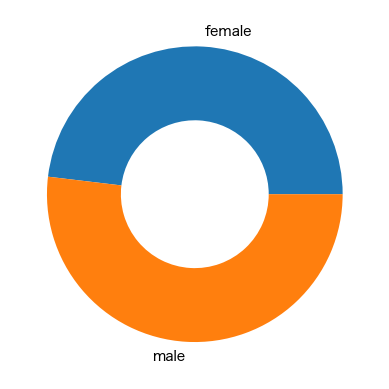

In [18]:
# 円グラフ（ドーナツ型にするには width を指定）
plt.pie(
    sizes,
    labels=labels,
    wedgeprops={'width': 0.5}  # ← ここでドーナツ型に
)

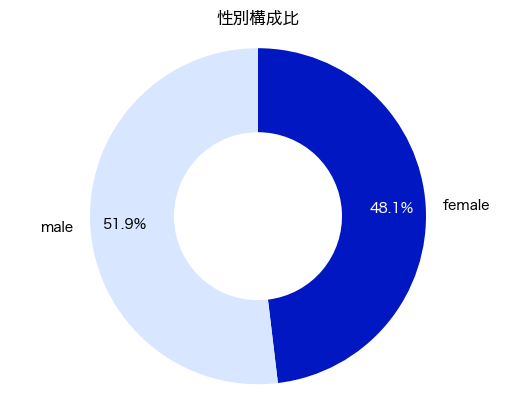

In [19]:
# フォーマットを調整する

fig, ax = plt.subplots()
wedges, texts, autotexts = plt.pie(
    sizes, # グラフのサイズを指定
    labels=labels, # グラフのラベルを指定
    colors = ['#0017C1','#D9E6FF'], # グラフの色を指定
    wedgeprops={'width': 0.5},  # ← ここでドーナツ型に
    startangle=90, #グラフの開始角度を指定
    counterclock=False, # グラフの回転方向を指定
    autopct='%1.1f%%', # グラフの割合を表示する
    pctdistance=0.8  # ← これでパーセント表示を外に寄せる
)

# 円形を維持
plt.axis('equal') # 縦横比を1:1にする

# タイトル
plt.title('性別構成比')# タイトルを指定

# %表示の色を個別に設定
pct_colors = ['white', 'black']  # % 表示の色
for autotext, color in zip(autotexts, pct_colors):
    autotext.set_color(color)

# 表示
plt.show()


In [20]:
def create_doughnut_chart(ax, title, labels, sizes):
    wedges, texts, autotexts = ax.pie(
        sizes,
        labels=labels,
        colors=['#0017C1', '#D9E6FF'],
        wedgeprops={'width': 0.5},
        startangle=90,
        counterclock=False,
        autopct='%1.1f%%',
        pctdistance=0.8
    )

    ax.axis('equal')            # 円形にする
    ax.set_title(title)

    pct_colors = ['white', 'black']
    for autotext, color in zip(autotexts, pct_colors):
        autotext.set_color(color)


## 5-3.棒グラフ 

In [21]:
# 年代ごとの件数を集計して表示
df_tmp = df.groupby(['年代'])['件数'].sum().reset_index()
df_tmp

,年代,件数
0,20代,792
1,30代,5522
2,40代,19099
3,50代,33238
4,60代,30119
5,70代,13412


In [22]:
# グラフを作成する要素を設定する
labels = df_tmp['年代'].values # 年代の値を取得

sizes = df_tmp['件数'].values # 件数の値を取得

total_values = sizes.sum() # 件数の合計を取得
sizes_percent = (sizes / total_values * 100).round() # 百分率を取得

print(labels)
print(sizes)
print(sizes_percent)

['20代' '30代' '40代' '50代' '60代' '70代']
[  792  5522 19099 33238 30119 13412]
[ 1.  5. 19. 33. 29. 13.]


<BarContainer object of 6 artists>

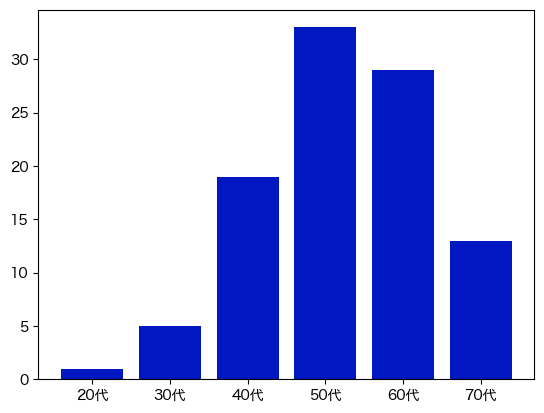

In [23]:
# 棒グラフを作成する
plt.bar(
    labels, # 横軸の値を指定
    sizes_percent, # 縦軸の値を指定
    color='#0017C1' # 棒グラフの色を指定
)

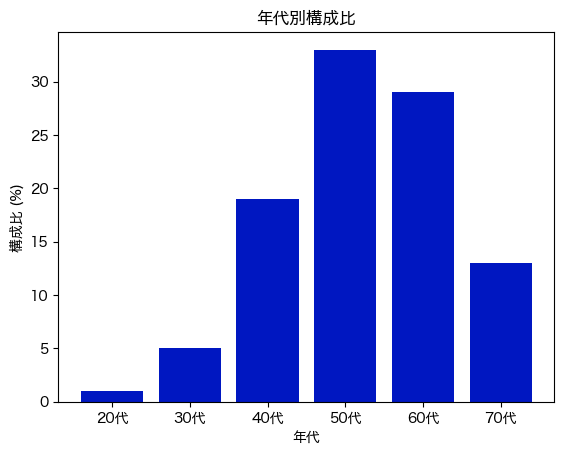

In [24]:
# フォーマットを調整

# 棒グラフを作成する
plt.bar(
    labels, # 横軸の値を指定
    sizes_percent, # 縦軸の値を指定
    color='#0017C1' # 棒グラフの色を指定
)

plt.title('年代別構成比') # タイトルを指定
plt.xlabel('年代') # 横軸のラベルを指定
plt.ylabel('構成比 (%)') # 縦軸のラベルを指定

plt.show() #グラフを表示

In [25]:
def create_bar_chart(ax, labels, sizes_percent):
    # 棒グラフを描画
    ax.bar(
        labels,               # 横軸のラベル
        sizes_percent,        # 縦軸の値
        color='#0017C1'       # 棒の色
    )

    ax.set_title('年代別構成比')     # タイトル
    ax.set_xlabel('年代')           # 横軸ラベル
    ax.set_ylabel('構成比 (%)')     # 縦軸ラベル


## 5-4. 折れ線グラフ

In [26]:
# 年月ごとの件数を集計する
df_tmp = df.groupby(['年', '月'])['件数'].sum().reset_index() 
df_tmp

,年,月,件数
0,2019年,01月,3035
1,2019年,02月,2616
2,2019年,03月,3001
3,2019年,04月,3048
4,2019年,05月,3015
5,2019年,06月,2679
6,2019年,07月,2806
7,2019年,08月,2416
8,2019年,09月,2211
9,2019年,10月,2034


In [27]:
# 年月ごとの件数を集計したデータをフィルタリングする
df_2019 = df_tmp[df_tmp['年'] == '2019年'] 
df_2020 = df_tmp[df_tmp['年'] == '2020年']
df_2021 = df_tmp[df_tmp['年'] == '2021年']

print('~~~~~~~~ 2019年のデータ ~~~~~~~~')
display(df_2019)

~~~~~~~~ 2019年のデータ ~~~~~~~~


,年,月,件数
0,2019年,01月,3035
1,2019年,02月,2616
2,2019年,03月,3001
3,2019年,04月,3048
4,2019年,05月,3015
5,2019年,06月,2679
6,2019年,07月,2806
7,2019年,08月,2416
8,2019年,09月,2211
9,2019年,10月,2034


In [28]:
# # グラフを作成する要素を設定する

# 月の値を取得 (月は共通なので、2019年の月を取得)
months = df_2019['月'].values 

print('~~~~~~~~ 月の値 ~~~~~~~~')
print(months)


# 件数の値を取得
sizes_2019 = df_2019['件数'].values
sizes_2020 = df_2020['件数'].values
sizes_2021 = df_2021['件数'].values

print('~~~~~~~~ 件数の値 ~~~~~~~~')
print('-- 2019年の件数 --') 
print(sizes_2019)
print('-- 2020年の件数 --')
print(sizes_2020)
print('-- 2021年の件数 --')
print(sizes_2021)


~~~~~~~~ 月の値 ~~~~~~~~
['01月' '02月' '03月' '04月' '05月' '06月' '07月' '08月' '09月' '10月' '11月' '12月']
~~~~~~~~ 件数の値 ~~~~~~~~
-- 2019年の件数 --
[3035 2616 3001 3048 3015 2679 2806 2416 2211 2034 1592 1589]
-- 2020年の件数 --
[3675 3292 3575 3552 3371 3401 3138 2744 2408 2128 1708 1534]
-- 2021年の件数 --
[3891 3655 4321 4119 3920 3733 3278 2925 2515 2024 1767 1466]


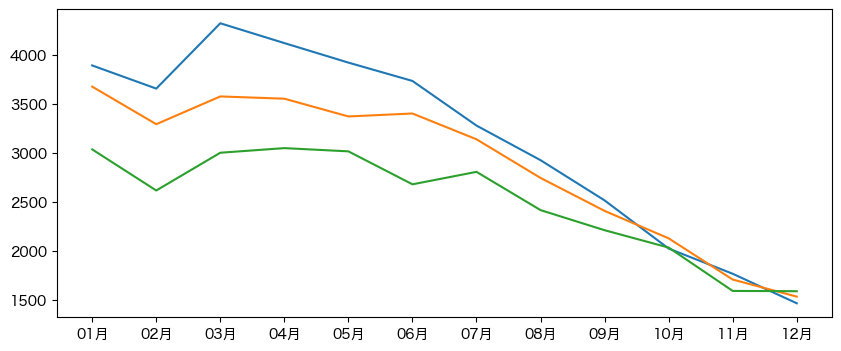

In [29]:
# グラフを作成する

plt.figure(figsize=(10, 4)) # グラフのサイズを指定

# 2021年のデータをプロットする
plt.plot(
    months, # 横軸の値を指定
    sizes_2021, # 縦軸の値を指定
)

# 2020年のデータをプロットする
plt.plot(
    months, # 横軸の値を指定
    sizes_2020, # 縦軸の値を指定
)

# 2019年のデータをプロットする
plt.plot(
    months, # 横軸の値を指定
    sizes_2019, # 縦軸の値を指定
)


plt.show() #グラフを表示

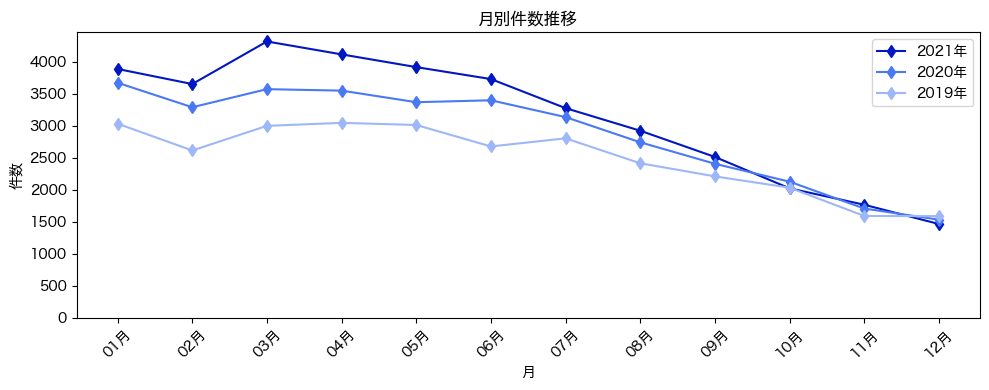

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # グラフのサイズを指定

# 2021年のデータ
plt.plot(
    months,
    sizes_2021,
    color='#0017C1',
    marker='d',
    label='2021年'
)

# 2020年のデータ
plt.plot(
    months,
    sizes_2020,
    color='#4979F5',
    marker='d',
    label='2020年'
)

# 2019年のデータ
plt.plot(
    months,
    sizes_2019,
    color='#9DB7F9',
    marker='d',  # ひし形マーカー
    label='2019年'
)

# タイトル・軸ラベル
plt.title('月別件数推移')
plt.xlabel('月')
plt.ylabel('件数')

# X軸のラベル回転
plt.xticks(rotation=45)

# Y軸を0から開始
plt.ylim(bottom=0)

# 凡例
plt.legend(loc='upper right')

# 表示
plt.tight_layout()
plt.show()


In [31]:
def create_line_chart(ax, months, sizes_2019, sizes_2020, sizes_2021):
    # 2021年のデータ
    ax.plot(
        months, sizes_2021,
        color='#0017C1', marker='d', label='2021年'
    )

    # 2020年のデータ
    ax.plot(
        months, sizes_2020,
        color='#4979F5', marker='d', label='2020年'
    )

    # 2019年のデータ
    ax.plot(
        months, sizes_2019,
        color='#9DB7F9', marker='d', label='2019年'
    )

    # タイトル・軸ラベル
    ax.set_title('月別件数推移')
    ax.set_xlabel('月')
    ax.set_ylabel('件数')

    # X軸ラベル回転
    ax.set_xticks(range(len(months)))
    ax.set_xticklabels(months, rotation=45)

    # Y軸を0から開始
    ax.set_ylim(bottom=0)

    # 凡例
    ax.legend(loc='upper right')


# 6. 作成したグラフを並べる

In [110]:
df_filtered = df.copy()

# フィルタリングする条件を指定
sex = [
  "female",
  "male"
  ]  # 性別を指定

product = [
  "prd_1",
  "prd_2"
  ] # 商品を指定

age = [
  "20代",
  "30代",
  "40代",
  "50代",
  "60代",
  "70代",
  ] # 年代を指定

year = [
  "2019年",
  "2020年",
  "2021年"
  ] # 年を指定



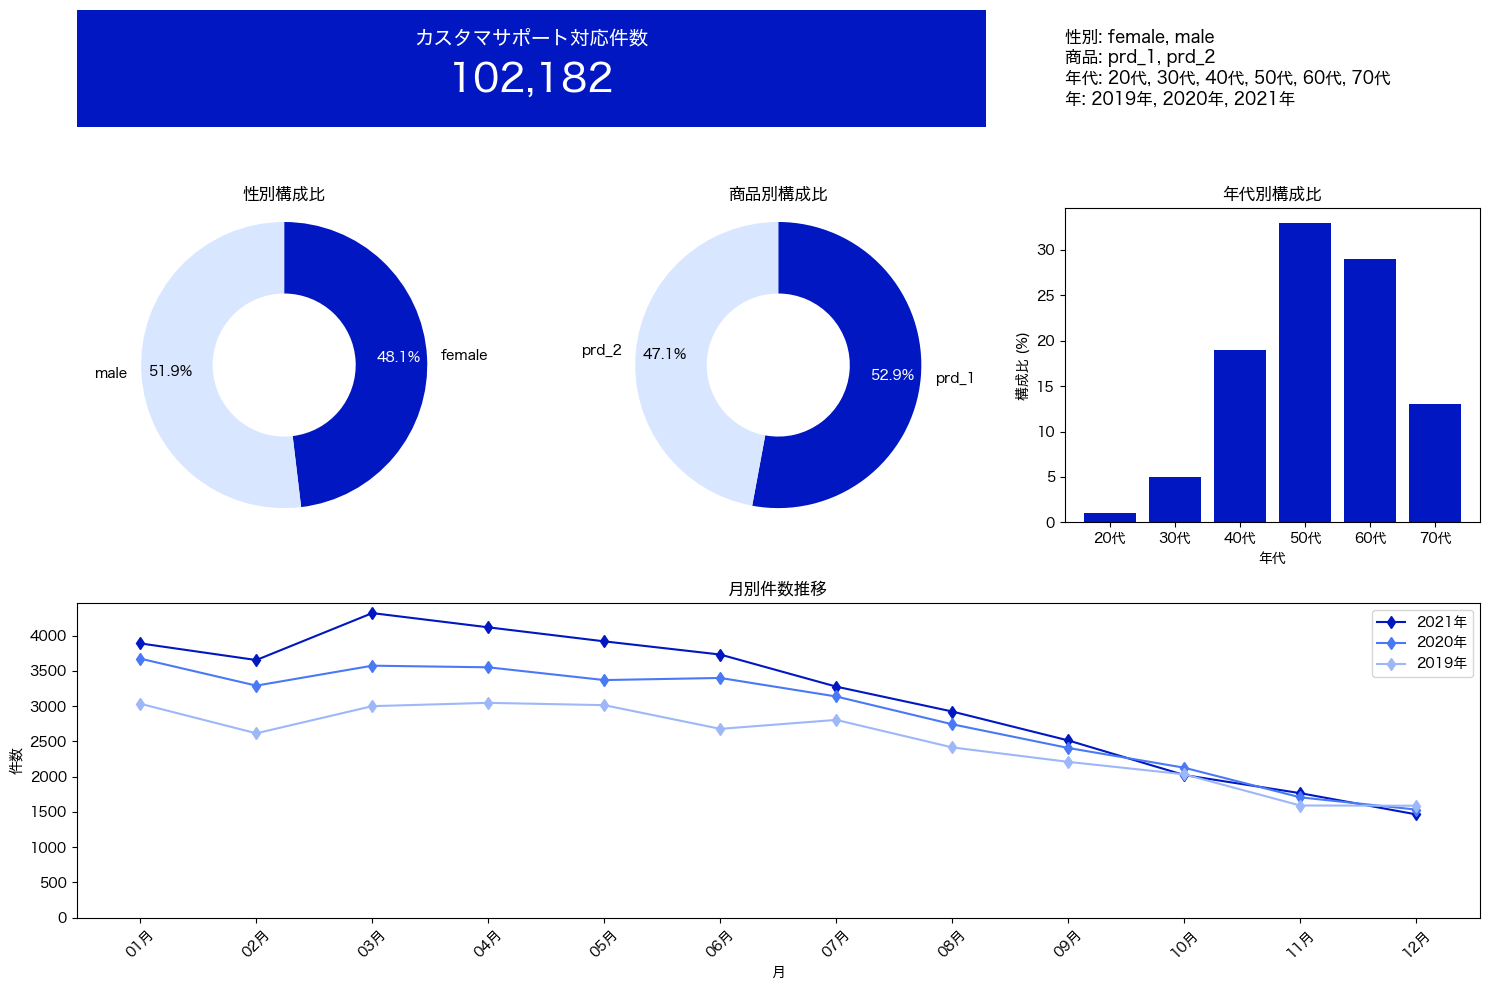

In [112]:
import matplotlib.gridspec as gridspec

# フィルタリング
df_filtered = df_filtered[df_filtered['性別'].isin(sex)] # 性別をフィルタリングする
df_filtered = df_filtered[df_filtered['商品'].isin(product)] # 商品をフィルタリングする
df_filtered = df_filtered[df_filtered['年代'].isin(age)] # 年代をフィルタリングする
df_filtered = df_filtered[df_filtered['年'].isin(year)] # 年をフィルタリングする

fig = plt.figure(figsize=(15, 10))
gs = gridspec.GridSpec(5, 3, figure=fig)


#~~~~~~~~~~~ カード ~~~~~~~~~~~~~
value_card = df_filtered['件数'].sum() 
ax_card = fig.add_subplot(gs[0, 0:2])
create_card(ax_card, value_card)


#~~~~~ フィルタリングした条件を表示する ~~~~~~
ax_info = fig.add_subplot(gs[0, 2])
ax_info.axis('off')  # 枠や軸を非表示にする

# 表示用のフィルタ内容を文字列に変換
text = f"性別: {', '.join(sex)}\n商品: {', '.join(product)}\n年代: {', '.join(map(str,age))}\n年: {', '.join(map(str, year))}"

# 中央に表示
ax_info.text(0, 0.5, text, ha='left', va='center', fontsize=12)


# ~~~~~ ドーナツグラフ 性別構成比 ~~~~~~
ax_sex = fig.add_subplot(gs[1:3, 0])
create_doughnut_chart(ax_sex, '性別構成比', df_filtered.groupby(['性別'])['件数'].sum().reset_index()['性別'].values, df_filtered.groupby(['性別'])['件数'].sum().reset_index()['件数'].values)

#~~~~~ ドーナツグラフ 商品別構成比 ~~~~~
ax_product = fig.add_subplot(gs[1:3, 1])
create_doughnut_chart(ax_product, '商品別構成比', df_filtered.groupby(['商品'])['件数'].sum().reset_index()['商品'].values, df_filtered.groupby(['商品'])['件数'].sum().reset_index()['件数'].values)

#~~~~~~ 棒グラフ 年代別構成比 ~~~~~~
ax_age = fig.add_subplot(gs[1:3, 2])
df_age = df_filtered.groupby(['年代'])['件数'].sum().reset_index()
labels_age = df_age['年代'].values
sizes_age = df_age['件数'].values
sizes_age_percent = (sizes_age / sizes_age.sum() * 100).round()
create_bar_chart(ax_age, labels_age, sizes_age_percent)

#~~~~~  折れ線グラフ 月別件数推移 ~~~~~~
ax_line = fig.add_subplot(gs[3:5, 0:3])  
create_line_chart(ax_line, months, sizes_2019, sizes_2020, sizes_2021)



plt.tight_layout()
plt.show()
